**PRACTICAL NO 8 : K-Means Clustering**

*  **Apply the K-Means algorithm to group similar data points into clusters.**
*   **Determine the optimal number of clusters using elbow method or silhouette analysis.**
*   **Visualize the clustering results and analyze the cluster characteristics.**



Dataset Head: 
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                 

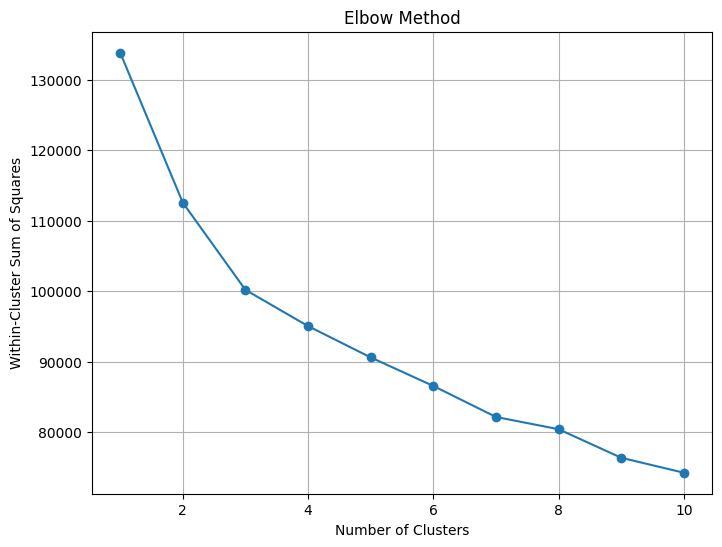

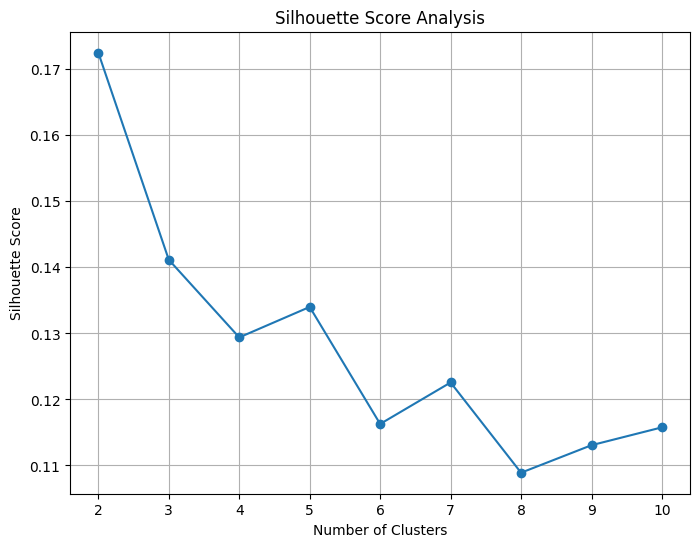

SSE for K=3: 100173.75968356349
Silhouette score for K=3: 0.1412


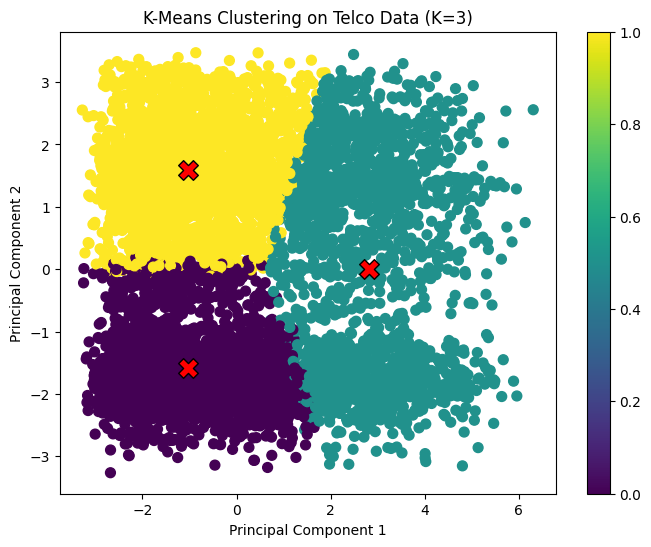


Cluster 0 Characteristics:

               Age  Number of Dependents      Zip Code     Latitude  \
count  2583.000000           2583.000000   2583.000000  2583.000000   
mean     46.315912              0.414634  91833.636469    33.952556   
std      16.825346              0.903330   1011.397294     0.771662   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  91104.000000    33.634626   
50%      46.000000              0.000000  92066.000000    33.987945   
75%      60.000000              0.000000  92550.000000    34.170510   
max      80.000000              7.000000  93726.000000    37.045840   

         Longitude     Population  Number of Referrals  Tenure in Months  \
count  2583.000000    2583.000000          2583.000000       2583.000000   
mean   -117.824397   30866.046845             1.461866         21.826558   
std       0.896320   21447.318495             2.691611         19.355477   
min    -120.727344      11.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# Load Dataset
# -----------------------------
df = pd.read_csv("telco.csv")
print("Dataset Head: ")
print(df.head())
print("\nDataset Shape: ",df.shape)
print("\nDataset Null Values: ")
print(df.isnull().sum())
print("Loading and preparing data...")
print(f"Original loaded rows: {len(pd.read_csv('telco.csv'))}, numeric rows used for clustering: {df.shape[0]}")

# -----------------------------
# Data Preprocessing
# -----------------------------

# Select numeric columns
X = df.select_dtypes(include=['int64', 'float64'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Elbow Method and Silhouette Score Calculation with prints
# -----------------------------
wess = []
sil_scores = []
k_range_start = 1
k_range_end = 11

print("\nEvaluating K range (this can take a little time)...")

for i in range(k_range_start, k_range_end):
    # Add n_init to suppress future warning from scikit-learn KMeans
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    current_inertia = kmeans.inertia_
    wess.append(current_inertia)

    if i > 1 and i < X_scaled.shape[0]: # Silhouette score is defined for k > 1 and k < n_samples
        current_sil = silhouette_score(X_scaled, kmeans.labels_)
        sil_scores.append(current_sil)
    else:
        current_sil = float("nan") # For K=1, silhouette is nan

    print(f"Evaluated K={i}: inertia={current_inertia:.4f}, silhouette={current_sil:.4f}")

plt.figure(figsize=(8,6))
plt.plot(range(k_range_start, k_range_end), wess, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
# For silhouette plot, the range starts from 2, corresponding to the collected sil_scores
plt.plot(range(k_range_start + 1, k_range_end), sil_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# -----------------------------
# Choose clusters (example: 3)
# -----------------------------
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
print(f"SSE for K={kmeans.n_clusters}: {kmeans.inertia_}")
# Also print the silhouette score for the chosen K
print(f"Silhouette score for K={kmeans.n_clusters}: {silhouette_score(X_scaled, labels):.4f}")

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids = pca.transform(kmeans.cluster_centers_)

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, edgecolor='k')
plt.title(f'K-Means Clustering on Telco Data (K={kmeans.n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# -----------------------------
# Cluster Characteristics
# -----------------------------
cluster_df = df.copy()
cluster_df['cluster'] = labels

for c in sorted(cluster_df['cluster'].unique()):
    print(f"\nCluster {c} Characteristics:\n")
    print(cluster_df[cluster_df['cluster'] == c].describe())